# Notebook: Previsão de Diabetes com Machine Learning

## 1. Introdução


### Objetivo: Desenvolver um modelo de Machine Learning para prever o risco de diabetes em pacientes usando dados clínicos.

### Fonte de Dados: Pima Indians Diabetes Database (Kaggle).

## 2. Configuração Inicial


### 2.1. Instalação de Bibliotecas

In [4]:

# pip install scikit-learn seaborn matplotlib

In [5]:
# pip install xgboost

### 2.2. Importação de Bibliotecas

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score,
 f1_score, roc_auc_score,classification_report,
    confusion_matrix, RocCurveDisplay)


## 3. Carregamento dos Dados

In [7]:
# Carregar o dataset
data = pd.read_csv('diabetes.csv', delimiter = ',')

### Visualizar as primeiras linhas

In [8]:
# Visualizar as primeiras linhas
print("\nPrimeiras linhas:\n")
data.head(n=10)


Primeiras linhas:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### 3.1. Resumo estatísticos das variáveis

### Visão Geral Estatística

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Informações do conjuto de Dados

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Verificação de Valores nulos

In [11]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Verificação de Duplicatas

In [12]:
data.duplicated().sum()

0

### Dimensionalidade do DataFrame.

In [13]:
data.shape

(768, 9)

### Verifica a quantidade de pessoas com Diabetes e sem Diabetes

In [14]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

###  Variância do conjunto de dados

In [15]:
data.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

## 4. Pré-processamento

### 4.1. Tratar Valores Inválidos (Zeros)

In [16]:
# Identificar colunas com valores zero inválidos
cols_zero_invalidas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Substituir zeros por NaN
data[cols_zero_invalidas] = data[cols_zero_invalidas].replace(0, np.nan)

In [17]:
data[cols_zero_invalidas]


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


### 4.1.1 Preencher Valores Ausentes com MEDIANA

In [18]:
# Preencher NaN com a mediana
imputer = SimpleImputer(strategy='median')
data[cols_zero_invalidas] = imputer.fit_transform(data[cols_zero_invalidas])

In [19]:
data.head(n=768)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


_______________________

## 5. Análise Exploratória (EDA)

### 5.1 Distribuição de Classes

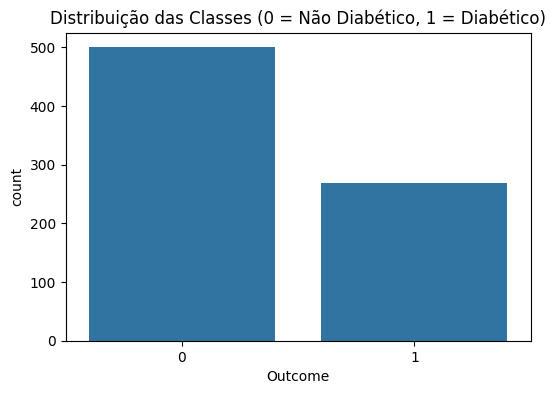

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribuição das Classes (0 = Não Diabético, 1 = Diabético)')
plt.show()

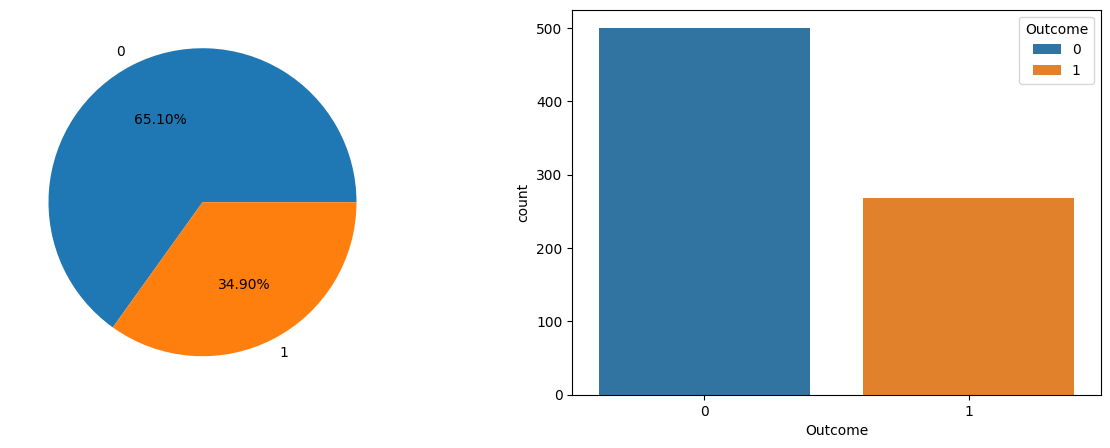

In [21]:

fig,ax=plt.subplots(1,2,figsize=(15,5))
tdf=data['Outcome'].value_counts().reset_index()
ax[0].pie(x=tdf['count'],labels=tdf['Outcome'],autopct='%.2f%%')
sns.countplot(data,x='Outcome',ax=ax[1],hue='Outcome')
plt.show()

In [22]:
print("Contagem de classes antes do balanceamento:")
print(data['Outcome'].value_counts())

Contagem de classes antes do balanceamento:
Outcome
0    500
1    268
Name: count, dtype: int64


### 5.2. Boxplot para Outliers

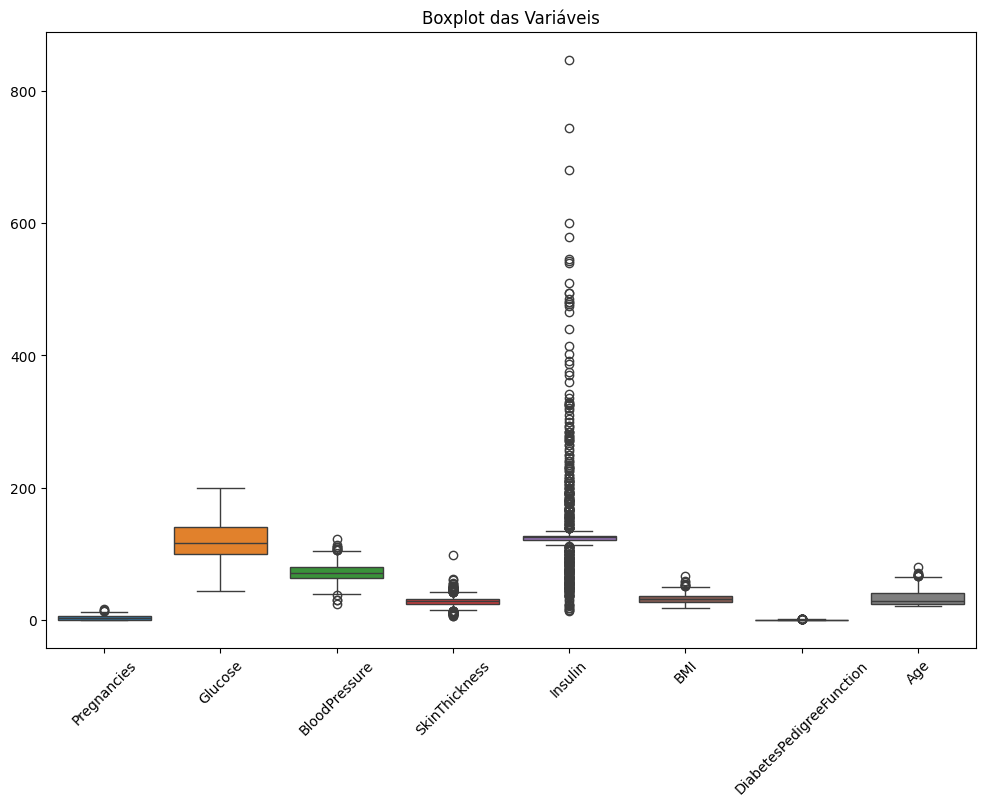

In [23]:
# Boxplots para identificar outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(columns='Outcome'))
plt.xticks(rotation=45)
plt.title('Boxplot das Variáveis')
plt.show()


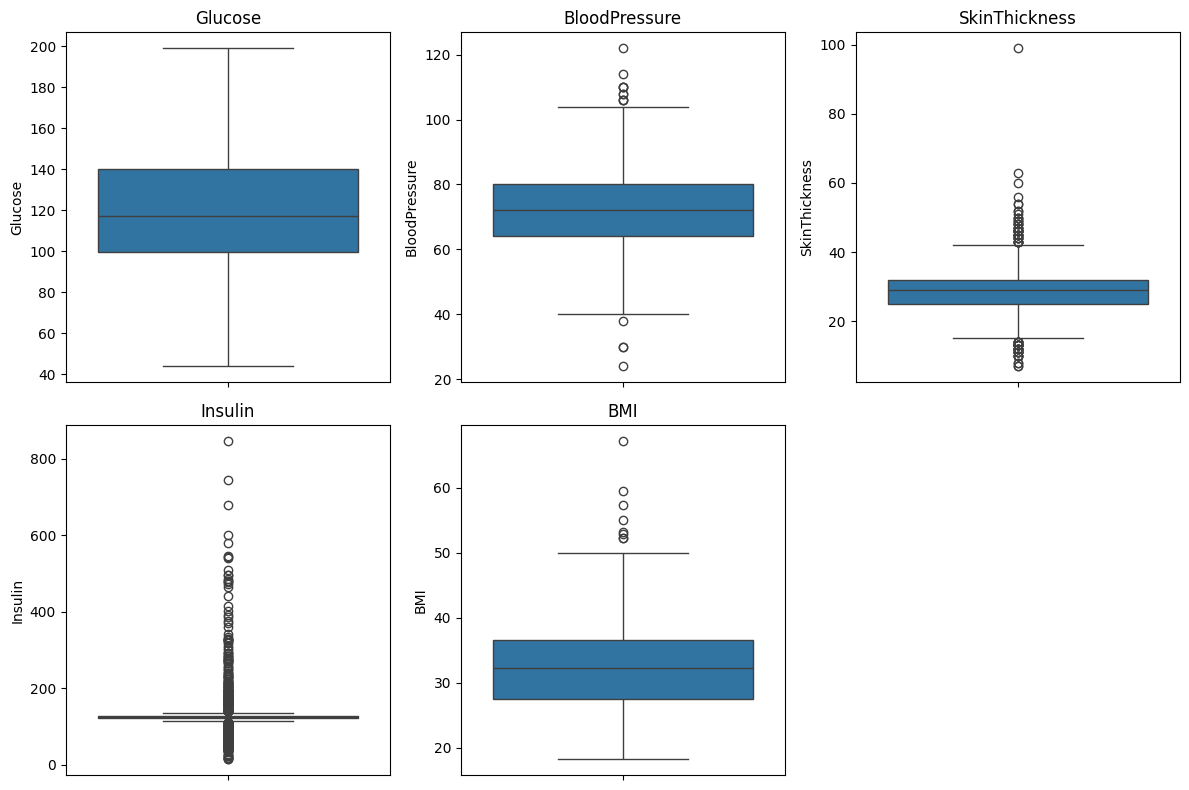

In [24]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_zero_invalidas):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### 5.3. Histogramas por Classe (Outcome)

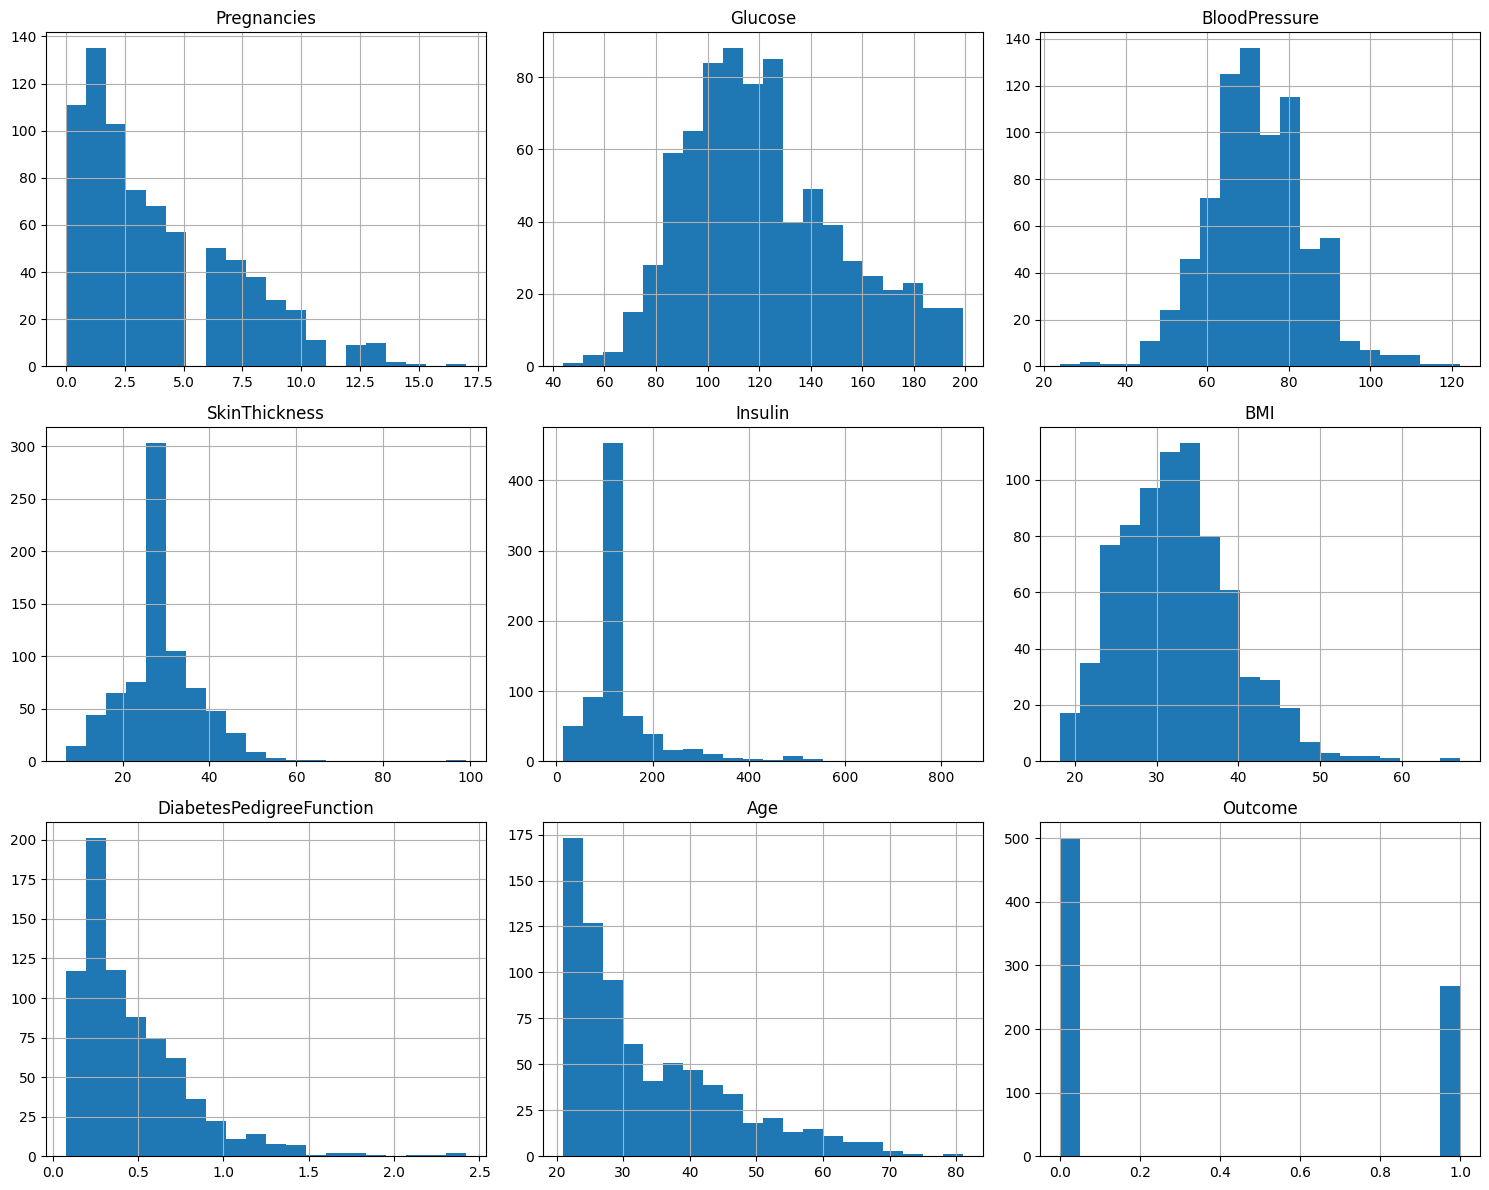

In [25]:
# Histogramas das features
data.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

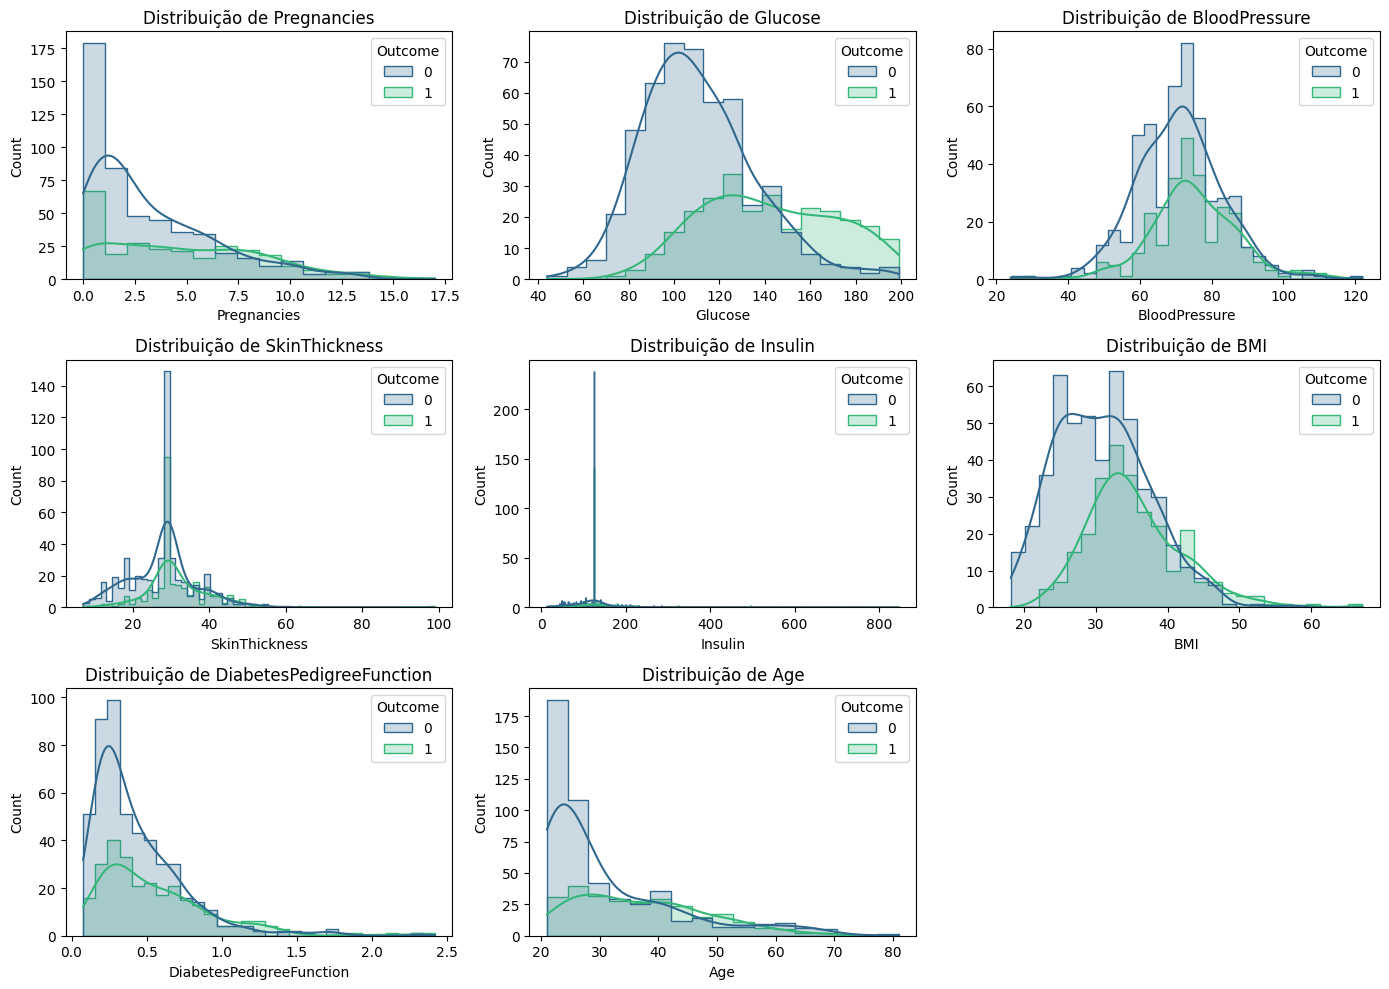

In [26]:

plt.figure(figsize=(14, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=col, hue='Outcome', kde=True, element='step', palette='viridis')
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

### 5.4. Correlação entre Variáveis

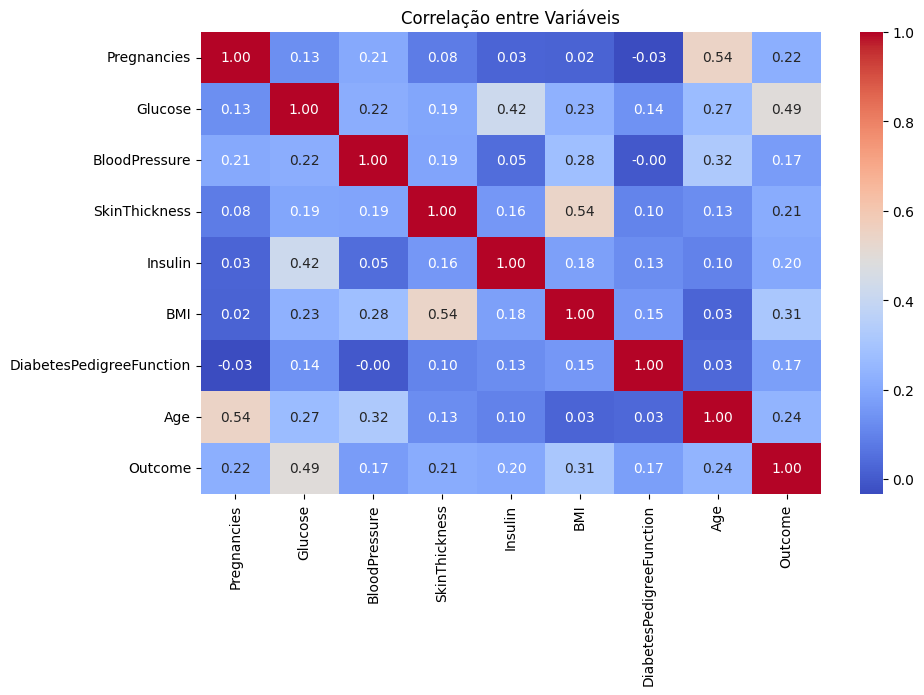

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis')
plt.show()

## Observação:

### Glucose e BMI têm alta correlação com Outcome.

_____________


## 6. Balanceamento dos Dados


In [28]:
# Separar features e target
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target

# Normalização dos dados usando o StandartScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para Balancear o conjunto de Dados
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Verificação de balanceamento
#ANTES
print("\nDistribuição de classes antes:")
print(y.value_counts())
#DEPOIS
# Criar novo dataframe balanceado
data_balanced = pd.DataFrame(X_balanced, columns=X.columns)
data_balanced['Outcome'] = y_balanced

# Verificar balanceamento
print("Distribuição após SMOTE:\n", data_balanced['Outcome'].value_counts())


Distribuição de classes antes:
Outcome
0    500
1    268
Name: count, dtype: int64
Distribuição após SMOTE:
 Outcome
1    500
0    500
Name: count, dtype: int64


## 7. Modelos

### 7.1. Dividir os Dados em Treino e Teste

In [29]:
X = data_balanced.drop('Outcome', axis=1)  # Features
y = data_balanced['Outcome']              # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 7.2. Escolher e Treinar o Modelo (RandomForest)

In [30]:
model = LogisticRegression(max_iter=500, solver='liblinear')

model.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

### 7.3. Fazer Previsões

In [31]:
y_pred = model.predict(X_test)

### 7.4. Avaliar Modelos

In [32]:
# 4. Avaliar o Modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.7366666666666667
Precisão: 0.7465753424657534
Recall: 0.7218543046357616
F1-score: 0.734006734006734

Matriz de Confusão:
[[112  37]
 [ 42 109]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       149
           1       0.75      0.72      0.73       151

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



### 7.5. Otimizar Hiperparâmetros com Grid Search

In [33]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Força da regularização
    'penalty': ['l1', 'l2']  # Tipo de regularização (L1 para Lasso, L2 para Ridge)
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Métrica de avaliação
    cv=5,  # Validação cruzada (5 folds)
    verbose=2,
    n_jobs=-1  # Usa todos os núcleos disponíveis
)

grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros
print("\nMelhores Hiperparâmetros:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l1; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s

[CV] END ..................................C=0.1, penalty=l2; total time=  -2.9s
[CV] END ..................................C=0.1, penalty=l2; total time=  -2.9s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ...................

### 7.6. Avaliar Modelo Otimizado

In [34]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nAvaliação do Modelo Otimizado:")
print("Acurácia:", accuracy_score(y_test, y_pred_best))
print("Precisão:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))

# Relatório de Classificação do Modelo Otimizado
print("\nRelatório de Classificação (Modelo Otimizado):")
print(classification_report(y_test, y_pred_best))


Avaliação do Modelo Otimizado:
Acurácia: 0.7333333333333333
Precisão: 0.7320261437908496
Recall: 0.7417218543046358
F1-score: 0.7368421052631579

Relatório de Classificação (Modelo Otimizado):
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       149
           1       0.73      0.74      0.74       151

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300




ROC-AUC Score: 0.8252366771856526


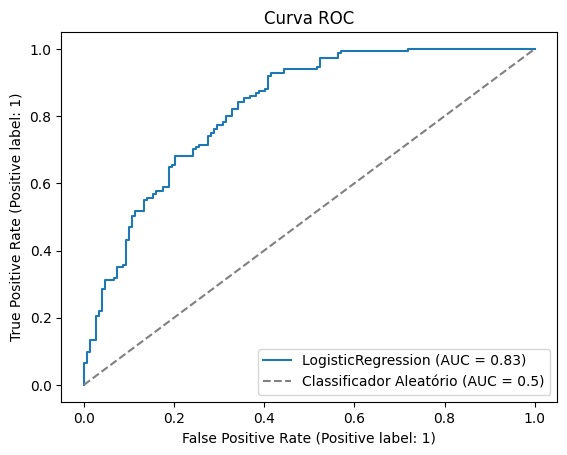

In [35]:
# 6. ROC-AUC e Curva ROC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva (1)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)

RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Classificador Aleatório (AUC = 0.5)')  # Linha diagonal
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### 7.7. Validação Cruzada

In [36]:
# Validação cruzada com F1-score
scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print("Validação Cruzada (F1-score):", scores.mean())
print("Desvio Padrão:", scores.std())

Validação Cruzada (F1-score): 0.735361687007812
Desvio Padrão: 0.015135186239873605


### 7.8. Análise de Feature Importance
Para entender quais features são mais relevantes para o modelo:

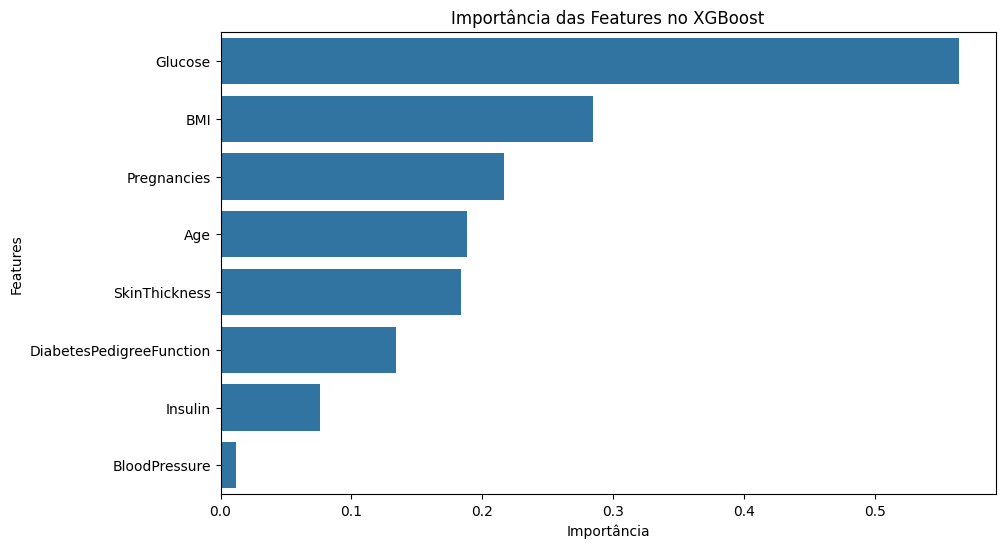

In [37]:
# Obter a importância das features
importances = np.abs(best_model.coef_[0])

# Criar um DataFrame para visualizar a importância das features
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Ordenar da mais importante para a menos importante
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotar a importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features no XGBoost')
plt.show()


## 8. Exemplo de Predição

In [38]:
# Exemplo de dados de entrada (features)

exemplo = {
    'Pregnancies': 1,          # Número de vezes que a pessoa engravidou
    'Glucose': 85,            # Nível de glicose no sangue
    'BloodPressure': 66,   # Pressão arterial
    'SkinThickness': 29,      # Espessura da pele
    'Insulin': 0,            # Nível de insulina
    'BMI': 26.6,              # Índice de Massa Corporal (BMI)
    'DiabetesPedigreeFunction': 0.351,  # Histórico de diabetes na família
    'Age': 31               # Idade da pessoa
}


# Converter o exemplo em um array numpy
import numpy as np
exemplo_array = np.array([list(exemplo.values())])

exemplo_array_scaled = scaler.transform(exemplo_array)

# Fazer a predição
predicao = best_model.predict(exemplo_array_scaled)

# Exibir o resultado
if predicao[0] == 1:
    print("Predição: Diabético")
else:
    print("Predição: Não Diabético")

Predição: Não Diabético


/home/bianca/projeto_previsão_diabetes/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/bianca/projeto_previsão_diabetes/venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
